<a id='home'></a>
### purpose

see how the degree of local adaptation affects performance

strict scatter plot with LA on x-axis and performance on y-axis, color code points by methods

In [1]:
from pythonimports import *
from myfigs import save_pdf

import MVP_summary_functions as mvp

import seaborn as sns

t1 = dt.now()  # notebook timer

summarydir = '/work/lotterhos/MVP-Offsets/run_20220919/summaries'
savedir = makedir(op.join(summarydir, 'figs/04_performance_vs_local-adaptation'))
pkldir = op.join(summarydir, 'all_performance_dicts')

mvp.latest_commit()
session_info.show()

#########################################################
Today:	February 15, 2023 - 15:36:51
python version: 3.8.5

Current commit of pythonimports:
commit f7e63eead1814fe6ce13da1f593ebfb19efdc4c2  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Wed Feb 15 14:14:00 2023 -0500

Current commit of MVP_offsets:
commit caa0fefccc33fb9bba80c1589c9992c24b1ca836  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Thu Feb 9 10:32:41 2023 -0500
#########################################################



In [2]:
# load validation scores organized by code in 00_save_level_scores.ipynb
# get validation scores across gardens across reps
all_scores = mvp.combine_level_dicts(use_bcs_data=False)

programs = keys(all_scores)

programs

reading reps (use_bcs_data = False, performance = 'garden_performance'): 100%|███████████████| 5/5 [00:06<00:00,  1.39s/it]


0-225
	 RONA num seeds =  224
	 lfmm2 num seeds =  224
	 GF num seeds =  224
	 rda num seeds =  224


225-450
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


450-675
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


675-900
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


900-1125
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225



 RONA df.shape = (674400, 15) num_seeds = 1124 num_reps = 5

 lfmm2 df.shape = (404400, 16) num_seeds = 1124 num_reps = 5

 GF df.shape = (337200, 15) num_seeds = 1124 num_reps = 5

 rda df.shape = (1078400, 17) num_seeds = 1124 num_reps = 5


['RONA', 'lfmm2', 'GF', 'rda']

In [3]:
landscape_dict = all_scores['GF']['landscape'].to_dict()

In [4]:
programs

['RONA', 'lfmm2', 'GF', 'rda']

In [5]:
hue_dicts = {}
for hue in keys(mvp.hue_order):
    if hue == 'program':
        continue
        
    hue_dicts[hue] = all_scores['GF'][hue].to_dict()  # key = seed val = hue    

def create_sns_dataframe(data):
    """Create long-form dataframe for seaborn."""
    df = pd.DataFrame(columns=['seed', 'program', 'score', 'shape', 'landscape'])
    for program, seed_scores in data.items():  # seed_scores is pd.Series w/index=seed & value=score; name='score'
        seeddf = pd.DataFrame(seed_scores)
        seeddf['program'] = program
        seeddf['seed'] = seeddf.index.tolist()
        seeddf['landscape'] = seeddf.index.map(landscape_dict)
        seeddf['shape'] = seeddf.program.map(mvp.markers)

        df = df.append(seeddf)

    summary = mvp.get_summary_data()
            
    df['final_LA'] = df.seed.map(summary['final_LA'])

    df['seed'] = df['seed'].astype(int)
    df['score'] = df['score'].astype(float)
    df['final_LA'] = df['final_LA'].astype(float)
    
    for hue, hue_dict in hue_dicts.items():
        df[hue] = df.index.map(hue_dict)

    return df


def create_fig(num_traits=1, marker_set='all', hue='program', apply_median=True):
    """Use kwargs to filter data to create lmplot colored by `hue`.
    
    Notes
    -----
    - filtering with subset_data will include ntraits-1 and ntraits-2 for 1-trait sims.
    """
    data = create_sns_dataframe(
        mvp.subset_data(all_scores, num_traits=num_traits, marker_set=marker_set, apply_median=apply_median)
    )

    program_order = ['RONA-sal_opt', 'RONA-temp_opt', 'lfmm2', 'rda', 'GF']

    g = sns.lmplot(data=data, x='final_LA', y='score', hue=hue, height=6, aspect=1.25, 
                   hue_order=program_order if hue=='program' else mvp.hue_order[hue],
                   scatter_kws={'facecolor' : 'none'},
                   palette=mvp.boxplot_kwargs['palette'],
                   markers=pd.Series(program_order).map(mvp.markers).tolist() if hue == 'program' else None)  # data['shape'].unique().tolist()
    
    g.ax.set_title(f'{num_traits = }\n{marker_set = }\nseed-level median performance for each program\n')
    
    g.ax.set_ylim((-1, 0.2))  # i know nothing goes beyond 0.2 - 🧠
    
    g.set_axis_labels("Degree of Local Adaptation", "Median Validation Score (Kendall's $\\tau$)", fontsize=12)
    
    g.ax.axhline(0, linestyle='--', color='gainsboro', linewidth=0.5, zorder=0)
    
    # adjust legend
    plt.setp(g.legend.get_texts(), fontsize='14') 
    plt.setp(g.legend.get_title(), fontsize='14')
    g.legend.set_bbox_to_anchor((1.03, 0.6))
    
    g.ax.set_ylim(g.ax.get_ylim()[::-1])
    
    g.tight_layout()
    
    points = 'median' if apply_median is True else 'allgardens'
    
    save_pdf(op.join(savedir, f'final_LA_vs_validation_{num_traits}_{marker_set}_{hue}_{points}.pdf'))
    
    plt.show()
    
    pass

# use seed-level median garden validation score for plotting

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_1_adaptive_program_median.pdf


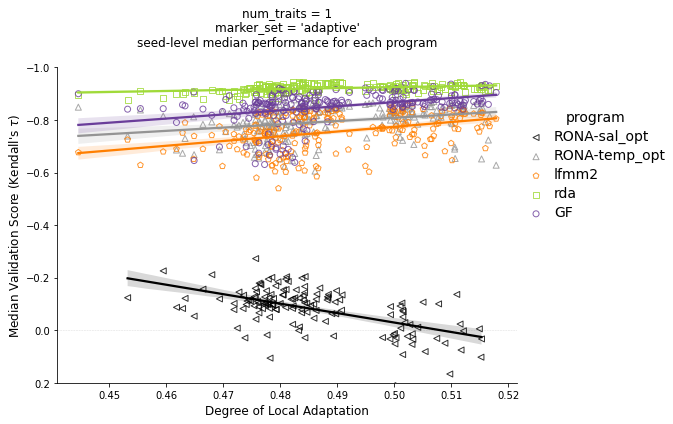

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_1_adaptive_landscape_median.pdf


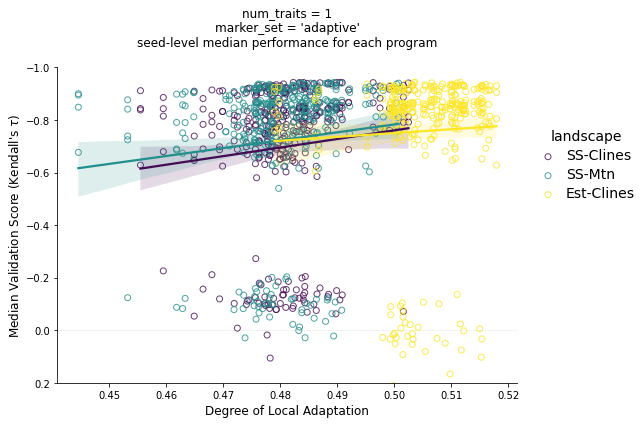

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_1_neutral_program_median.pdf


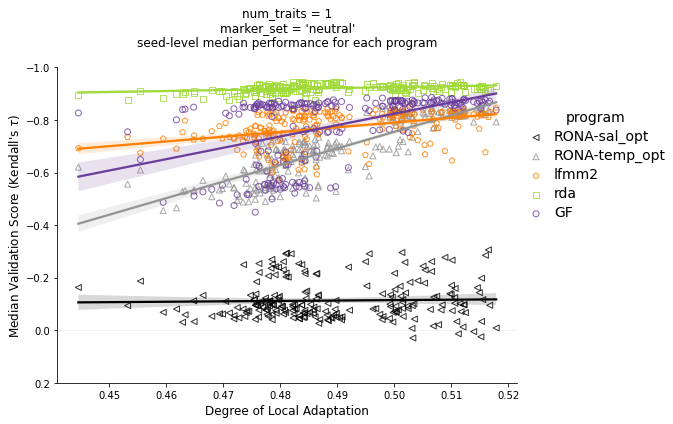

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_1_neutral_landscape_median.pdf


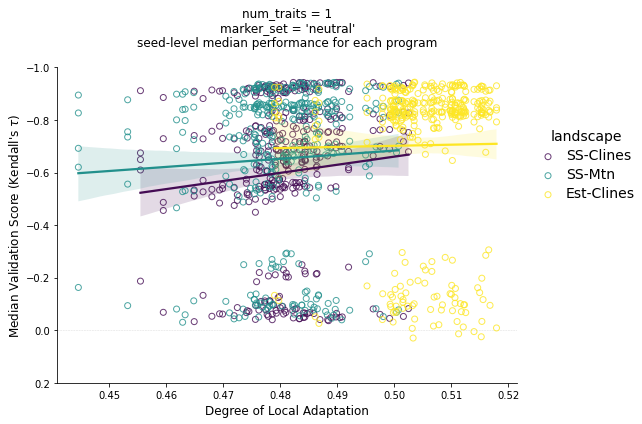

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_1_all_program_median.pdf


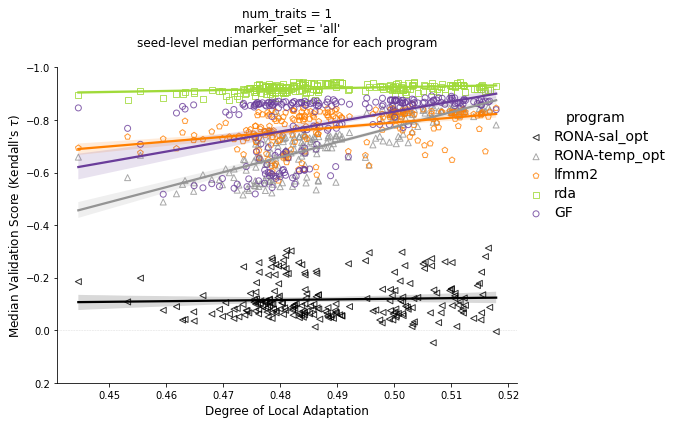

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_1_all_landscape_median.pdf


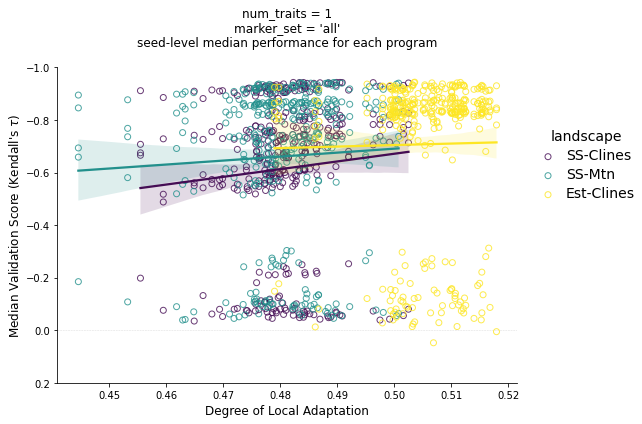

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_adaptive_program_median.pdf


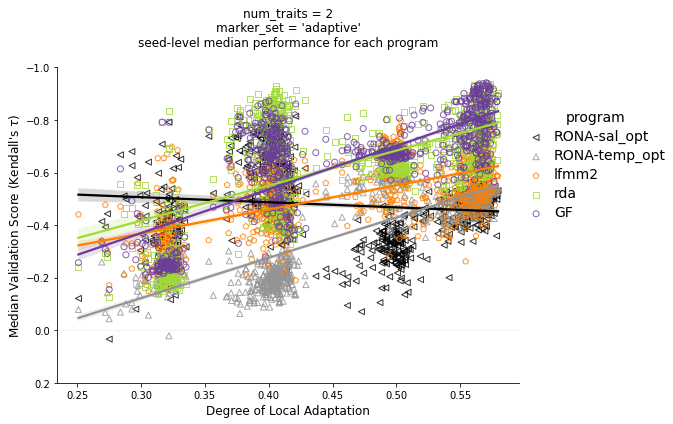

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_adaptive_landscape_median.pdf


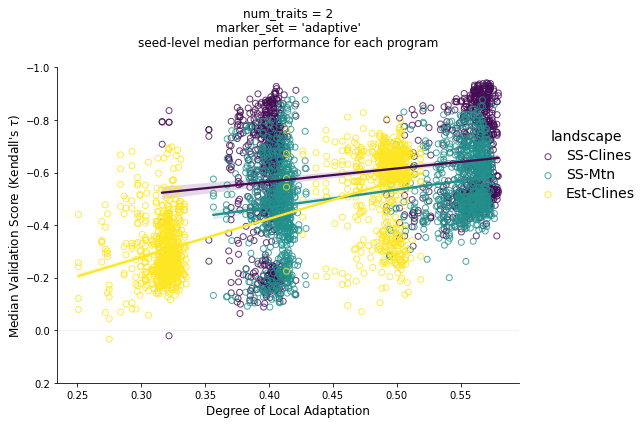

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_neutral_program_median.pdf


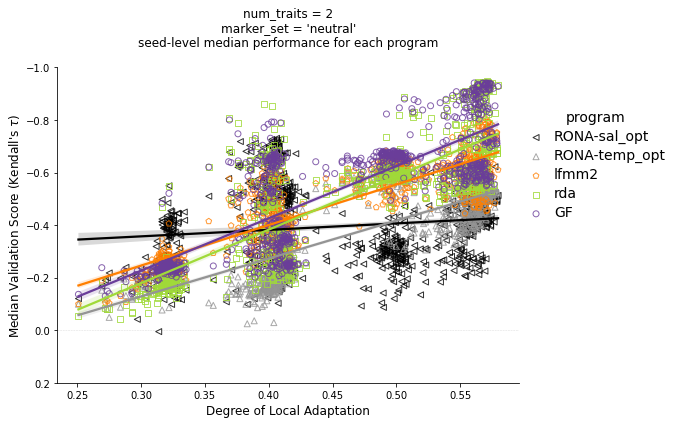

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_neutral_landscape_median.pdf


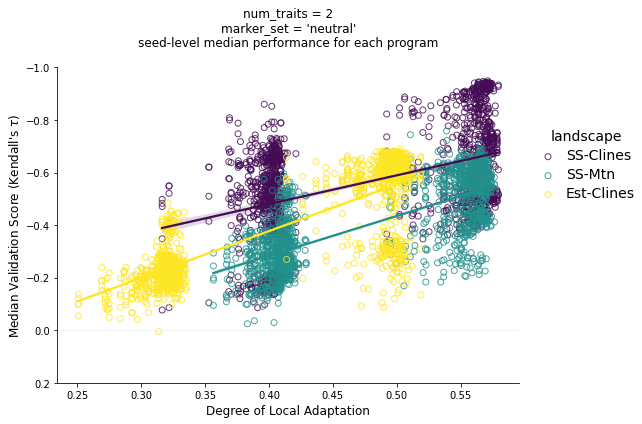

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_program_median.pdf


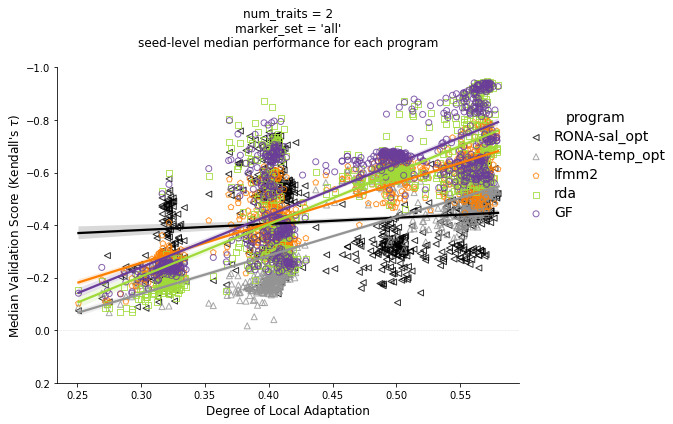

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_landscape_median.pdf


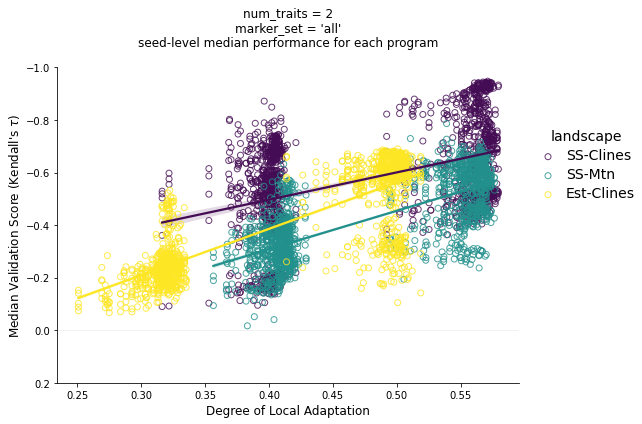

In [6]:
for num_traits in [1, 2]:
    for marker_set in ['adaptive', 'neutral', 'all']:
        for hue in ['program', 'landscape']:
            create_fig(hue=hue, marker_set=marker_set, num_traits=num_traits, apply_median=True)

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_landscape_median.pdf


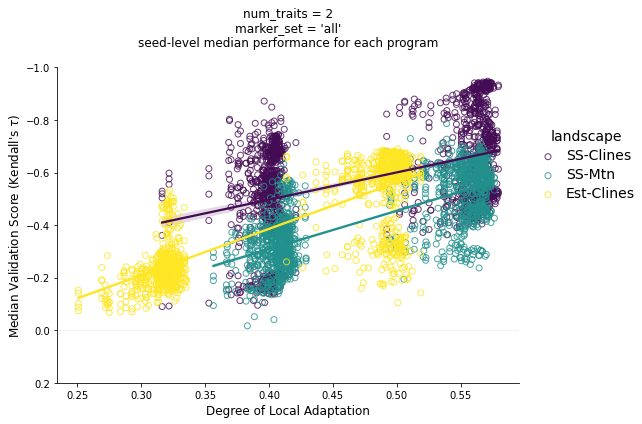

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_glevel_median.pdf


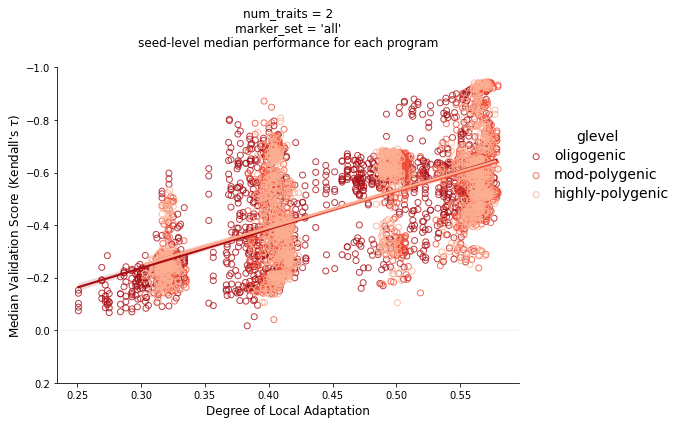

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_pleio_median.pdf


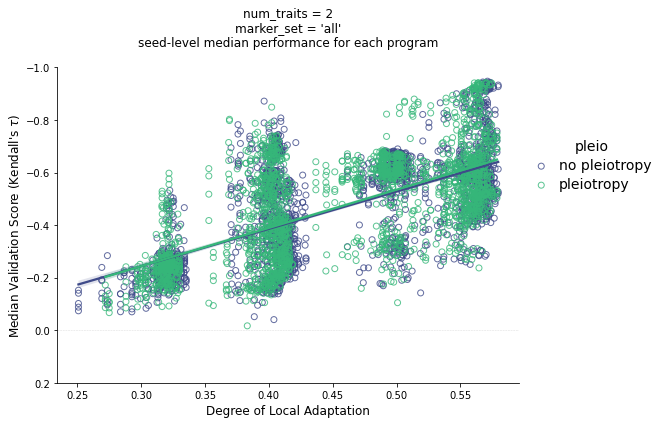

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_slevel_median.pdf


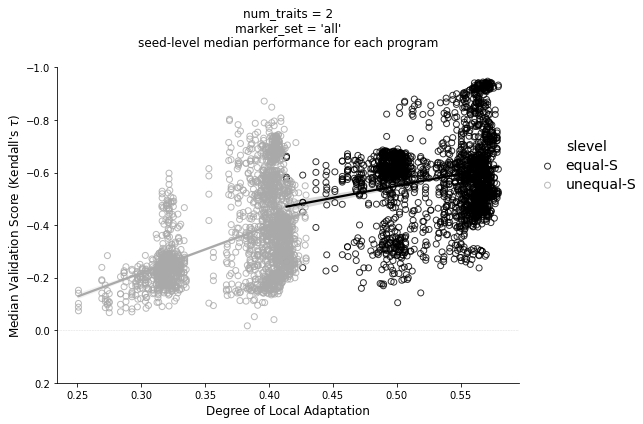

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_popsize_median.pdf


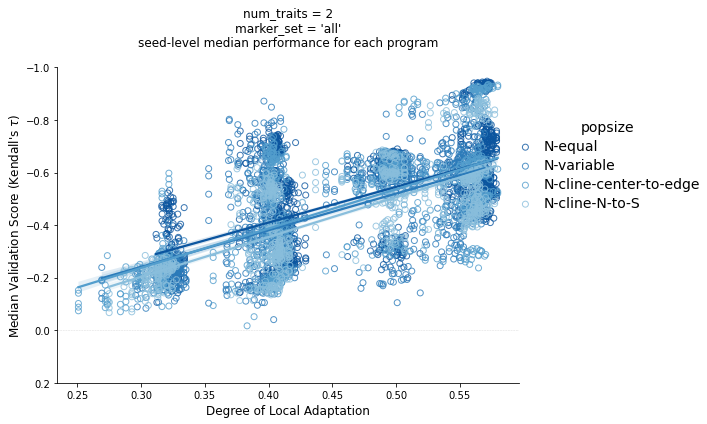

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_migration_median.pdf


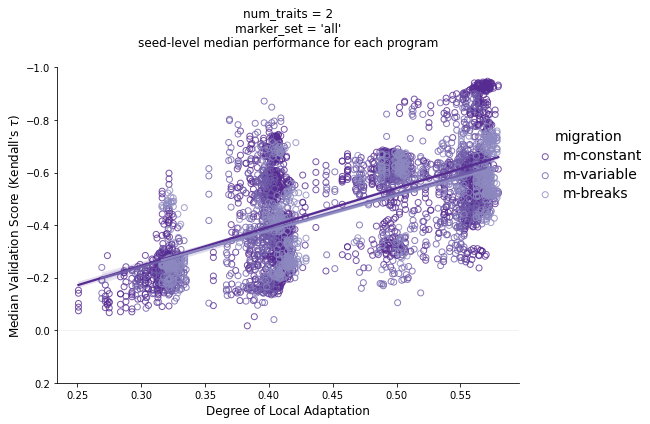

In [7]:
num_traits = 2
marker_set = 'all'
for hue in mvp.hue_order.keys():
    if hue in ['program', 'marker_set', 'noncausal_env']:
        continue
        
    create_fig(hue=hue, marker_set=marker_set, num_traits=num_traits, apply_median=True)

# plot all garden validation scores for plotting

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_1_adaptive_program_allgardens.pdf


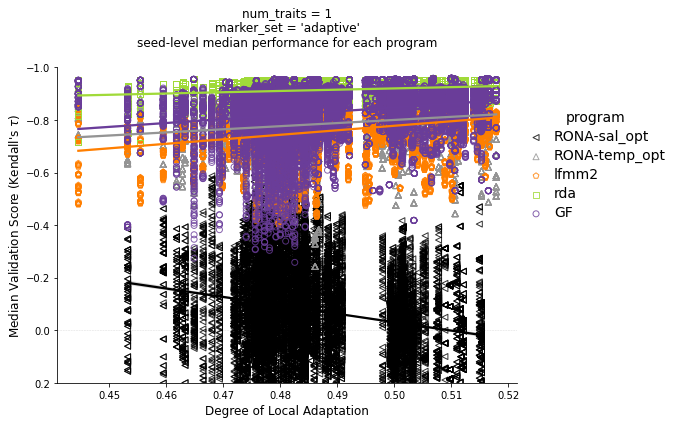

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_1_adaptive_landscape_allgardens.pdf


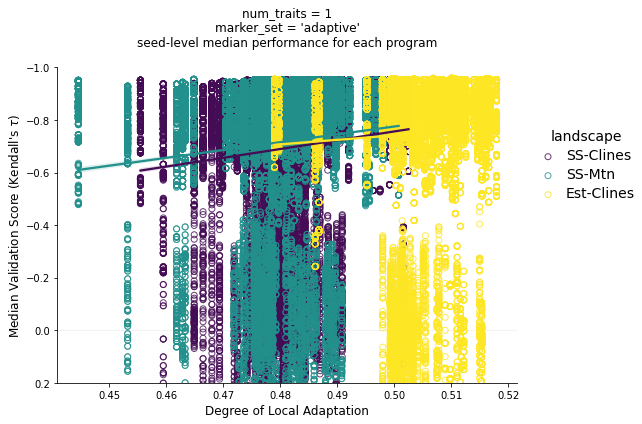

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_1_neutral_program_allgardens.pdf


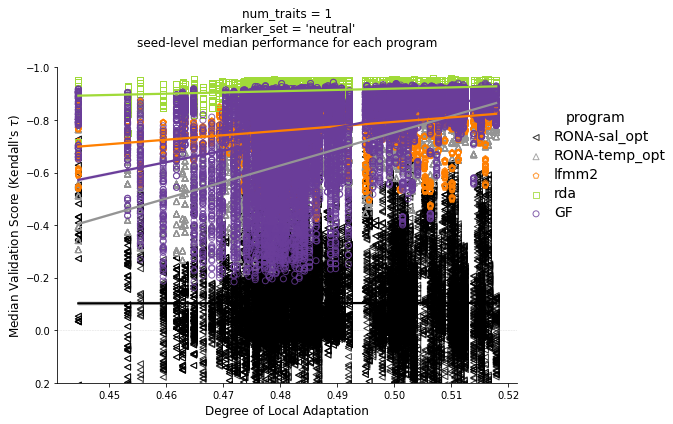

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_1_neutral_landscape_allgardens.pdf


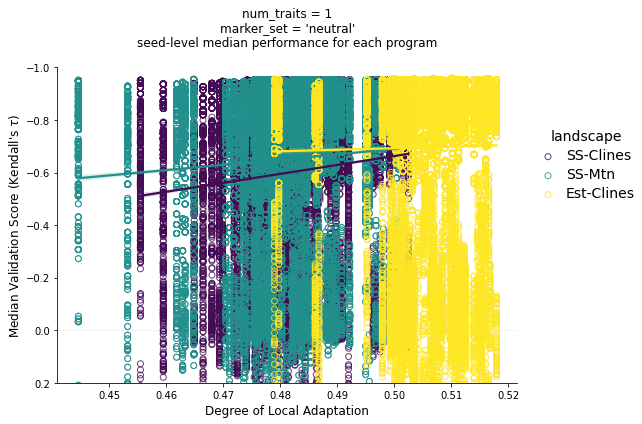

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_1_all_program_allgardens.pdf


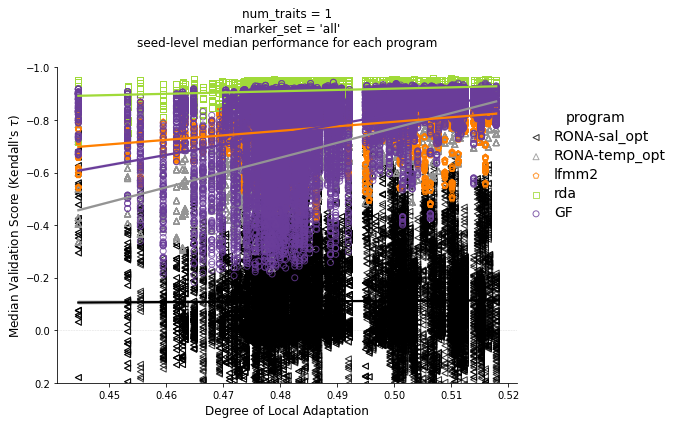

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_1_all_landscape_allgardens.pdf


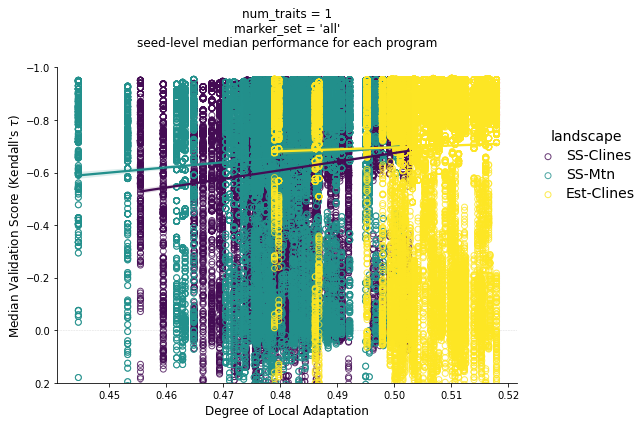

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_adaptive_program_allgardens.pdf


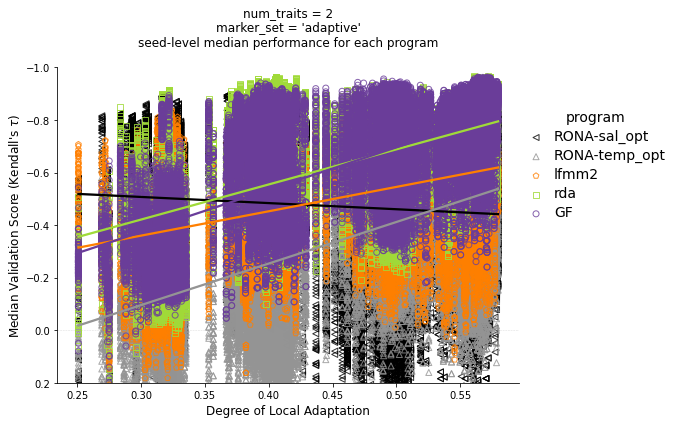

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_adaptive_landscape_allgardens.pdf


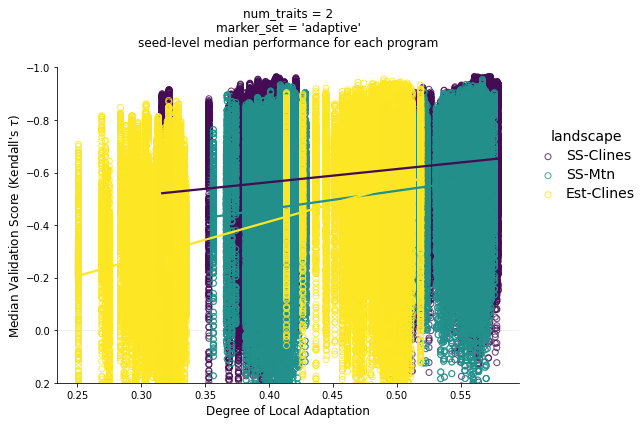

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_neutral_program_allgardens.pdf


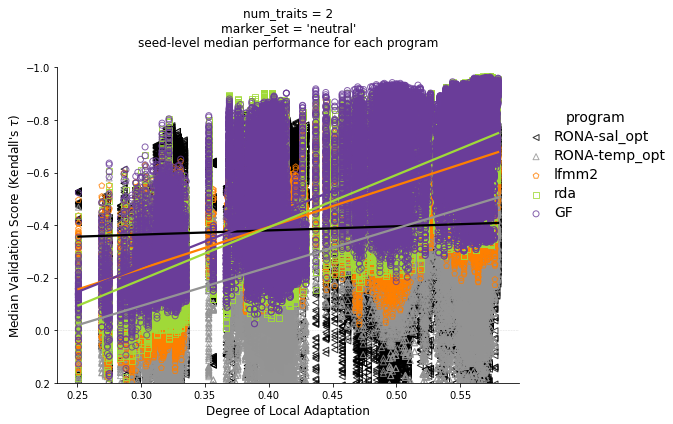

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_neutral_landscape_allgardens.pdf


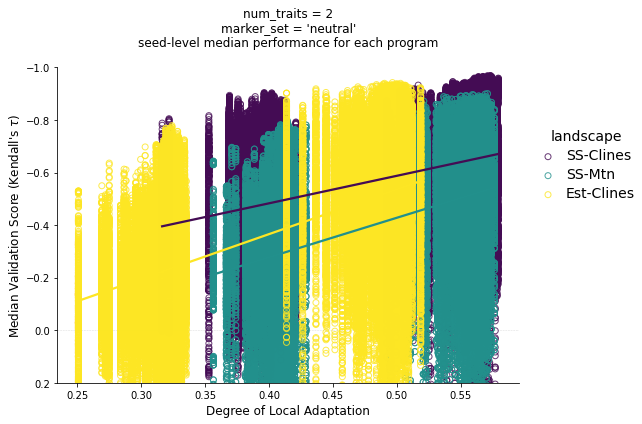

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_program_allgardens.pdf


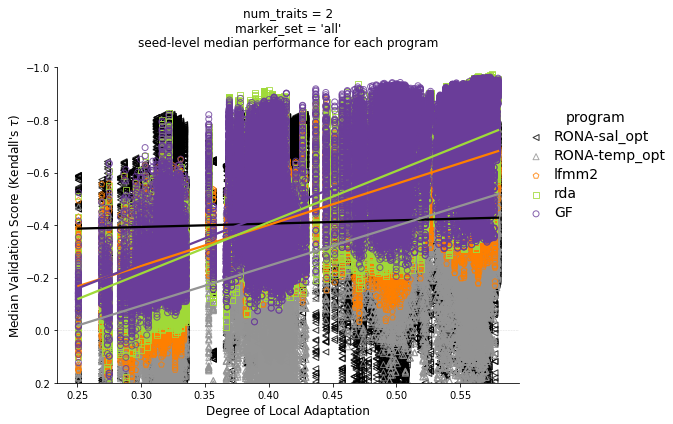

RONA 200
lfmm2 100
GF 100
rda 100
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_landscape_allgardens.pdf


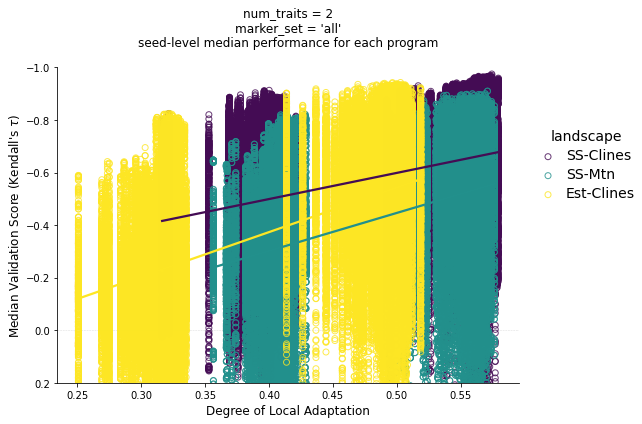

In [8]:
for num_traits in [1, 2]:
    for marker_set in ['adaptive', 'neutral', 'all']:
        for hue in ['program', 'landscape']:
            create_fig(hue=hue, marker_set=marker_set, num_traits=num_traits, apply_median=False)

In [9]:
formatclock(dt.now() - t1, exact=True)

'0-00:06:52'